## EMERGENCY vs NON_EMERGENCY VEHICLE IMAGE CLASSIFICATION

    - Here we will be using neural network to build basic model of emergency and non_emergency vehicle classification.
    
    - We are not using CNN (Convolution Neural Network).

### `STEP 1: IMPORTING LIBRARIES`

In [1]:
import numpy as np
import pandas as pd
import skimage
import matplotlib.pyplot as plt

from skimage.io import imread, imshow

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

### `STEP 2: IMPORTING DATASET`

In [2]:
data = pd.read_csv('Dataset/emergency_classification.csv')
print("Dataset Imported Successfully")

Dataset Imported Successfully


### `STEP 3: EXPLORING DATASET / DATA PREPROCESSING`

In [3]:
# Checking Top Rows

data.head(3)

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1


In [4]:
# Checking target column distribution

data.emergency_or_not.value_counts()

0    1361
1     991
Name: emergency_or_not, dtype: int64

In [5]:
# Loading image dataset and storing it in numpy array.

X  = []

for image_name in data.image_names:
    img = imread('Dataset/images/' + image_name)
    X.append(img)
    

X=np.array(X)


y = data.emergency_or_not.values

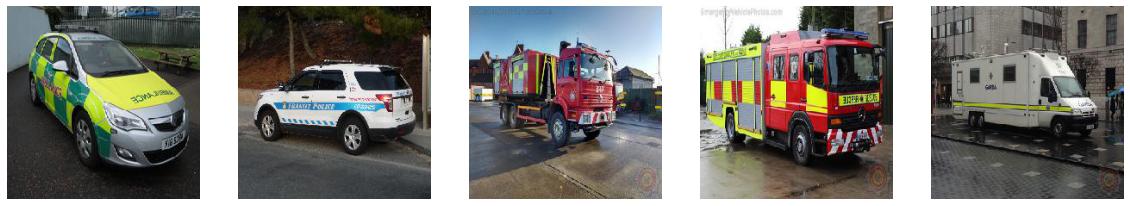

In [6]:
# Viewing images

fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(0,5):
    ax[i].imshow(X[i])
    ax[i].axis('off')

In [7]:
X.shape

(2352, 224, 224, 3)

    - We have 2352 images of height and width 224 x 224 and 3 channels RGB

#### `DATA PREPROCESSING`

    1) We will convert 3 dimensional into 1 dimensional image since NN takes only 1-D input.
    
    2) We will also normalize the pixel values for faster processing.
    

In [8]:
# Converting 3D into 1D.

X = X.reshape(X.shape[0], (224*224*3))
X.shape

(2352, 150528)

    - Within the reshape function  we have mentioned the nos. of images and new size of each image.
    
    - We have 2353 images and 1,50,528 features for a single image.

In [9]:
# Mininmum and Maximum value of the pixel.

X.min(), X.max()

(0, 255)

In [10]:
# Normalizing pixel values.

X = X / X.max()

In [11]:
# Minimum and Maximum value of the pixel.

X.min(), X.max()

(0.0, 1.0)

<br>

### `STEP 4: BUILD MODEL`

In [12]:
# Printing Kera and Tensorflow version 

import keras
import tensorflow

print("Keras version      : {}".format(keras.__version__))
print("Tensorflow version : {}".format(tensorflow.__version__))

Keras version      : 2.4.3
Tensorflow version : 2.3.1


#### `STEPS TO BUILD NEURAL NETWORK`

<ol>1. Loading the dataset</ol>
<ol>2. Creating training and validation set</ol>
<ol>3. Defining the architecture of the model</ol>
<ol>4. Compiling the model (defining loss function, optimizer)</ol>
<ol>5. Training the model</ol>
<ol>6. Evaluating model performance on training and validation set</ol>
<ol>7. Visualizing models performance </ol>

#### `CREATING TRAINING, VALIDATION & TEST SET`

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 42)

In [14]:
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train, random_state = 42)

<br>

#### `DEFINING MODEL ARCHITECTURE`

In [15]:
# Creating skeleton of model

from keras.models import Sequential
model = Sequential()

In [16]:
# Defining Layers

from keras.layers import InputLayer, Dense

In [17]:
# Nos of input neurons 

input_neurons = x_train.shape[1]
input_neurons

150528

In [18]:
# Nos of output neurons 

output_neurons = 1
output_neurons

1

In [19]:
# Nos of Hidden Layer / Nos. of neurons in hidden layer - Choosen arbitarily

nos_of_hidden_layer   = 2
neurons_hidden_layer_1 = 100
neurons_hidden_layer_2 = 50

In [20]:
# Defining the architecture of the model

model = Sequential()
model.add(InputLayer(input_shape=(input_neurons)))
model.add(Dense(units=neurons_hidden_layer_1, activation='relu'))
model.add(Dense(units=neurons_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [21]:
# Summary of model

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               15052900  
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 15,058,001
Trainable params: 15,058,001
Non-trainable params: 0
_________________________________________________________________


<br>

#### `COMPILING THE MODEL` 

In [22]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

<br>

#### `TRAINING THE MODEL`

In [23]:
model_history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size=128)

Epoch 1/50
14/14 [==============================] - 3s 229ms/step - loss: 18.7717 - accuracy: 0.4894 - val_loss: 1.6393 - val_accuracy: 0.6061
Epoch 2/50
14/14 [==============================] - 2s 156ms/step - loss: 3.3542 - accuracy: 0.5904 - val_loss: 2.1853 - val_accuracy: 0.6203
Epoch 3/50
14/14 [==============================] - 2s 129ms/step - loss: 1.1290 - accuracy: 0.6803 - val_loss: 0.8023 - val_accuracy: 0.6651
Epoch 4/50
14/14 [==============================] - 2s 134ms/step - loss: 0.7831 - accuracy: 0.6749 - val_loss: 0.7878 - val_accuracy: 0.6392
Epoch 5/50
14/14 [==============================] - 2s 130ms/step - loss: 0.6120 - accuracy: 0.7193 - val_loss: 0.9484 - val_accuracy: 0.5495
Epoch 6/50
14/14 [==============================] - 2s 126ms/step - loss: 0.8080 - accuracy: 0.6767 - val_loss: 0.9224 - val_accuracy: 0.6250
Epoch 7/50
14/14 [==============================] - 2s 123ms/step - loss: 0.8911 - accuracy: 0.6702 - val_loss: 2.3866 - val_accuracy: 0.5778
Epoch

<br>

#### `EVALUATING MODEL ON TEST DATA`

In [76]:
# Getting predictions for the test set

prediction = model.predict_classes(X_test)

In [77]:
# Getting accuracy score - Test Data 

from sklearn.metrics import accuracy_score
prediction = model.predict_classes(X_test)
print("Accuracy_Score : {}".format(accuracy_score(prediction, y_test) * 100))

Accuracy_Score : 76.27118644067797


In [101]:
from sklearn.metrics import classification_report
print("\t\t\tCLASSIFICATION REPORT:\n")
print(classification_report(y_test, prediction),'\n')

print("\t\t\tCONFUSION MATRIX:\n")
print(pd.crosstab(y_test, prediction.flatten(), rownames=['Actual Species'], colnames = ['Predicted Species']), '\n')

			CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.76      0.85      0.81       137
           1       0.76      0.64      0.69        99

    accuracy                           0.76       236
   macro avg       0.76      0.75      0.75       236
weighted avg       0.76      0.76      0.76       236
 

			CONFUSION MATRIX:

Predicted Species    0   1
Actual Species            
0                  117  20
1                   36  63 



In [78]:
# Getting accuracy score - Validation Data

prediction1 = model.predict_classes(x_val)
print("Accuracy_Score : {}".format(accuracy_score(prediction1, y_val) * 100))

Accuracy_Score : 72.64150943396226


<br>

#### `VISUALIZING MODELS PERFORMANCE`

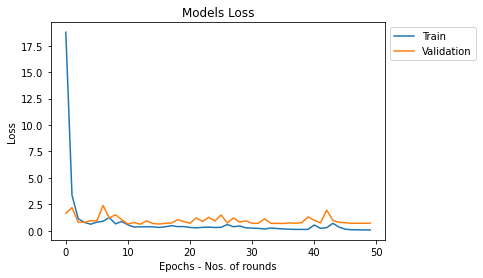

In [27]:
# Summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Models Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs - Nos. of rounds')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor = (1,1))
plt.show()

    - We can see that after 10 epochs there was no significant change in the loss.

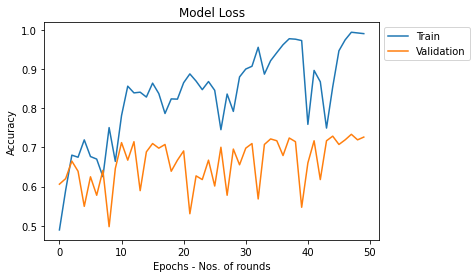

In [28]:
# Summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs - Nos. of rounds')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor = (1,1))
plt.show()

    - Initially training and validation accuracy is same.
 
    - After certain epochs train accuracy keeps increasing whereas validation accuracy increases slightly or remains same.

<br>

#### `TESTING WITH RANDOM IMAGES`

> `TEST CASE 1`

Emergency Vehicle


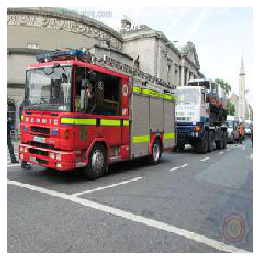

In [92]:
# Taking any random image and storing them into an array
X1 = []

img = imread('Dataset/images/465.jpg')
imshow(img)
plt.axis('off')

X1.append(img)
    
X1=np.array(X1)

# Converting 3D into 1D
X1 = X1.reshape(X1.shape[0], (224*224*3))

# Normalizing pixel value
X1 = X1 / X1.max()

# Predicting the class
if model.predict_classes(X1) == 1:
    print("Emergency Vehicle")
else:
    print("Non-Emergency Vehicle")

> `TEST CASE 2`

Non-Emergency Vehicle


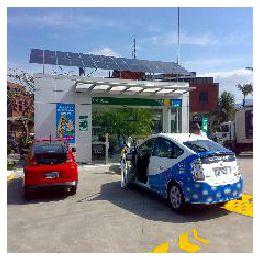

In [95]:
# Taking any random image and storing them into an array
X1 = []

img = imread('Dataset/images/1003.jpg')
imshow(img)
plt.axis('off')

X1.append(img)
    
X1=np.array(X1)

# Converting 3D into 1D
X1 = X1.reshape(X1.shape[0], (224*224*3))

# Normalizing pixel value
X1 = X1 / X1.max()

# Predicting the class
if model.predict_classes(X1) == 1:
    print("Emergency Vehicle")
else:
    print("Non-Emergency Vehicle")

<br>

### `STEP 4: HYPERPARAMETER TUNING`

We can do following hyper parameter tuning of our neural network.

    1. Change activation function of hidden layer
    2. Increase hidden neurons
    3. Increase hidden layers
    4. Increase number of epochs (More epochs increases the training time)
    5. Change optimizer (We have selected adam to be the best)

> __`CHANGING ACTIVATION FUNCTION`__

In [103]:
# Changing activation function from relu -> sigmoid 
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons)))
model.add(Dense(units=neurons_hidden_layer_1, activation='sigmoid'))
model.add(Dense(units=neurons_hidden_layer_2, activation='sigmoid'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Training model for 50 epochs
model_history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size=128)

Epoch 1/50
14/14 [==============================] - 2s 111ms/step - loss: 0.7144 - accuracy: 0.4988 - val_loss: 0.6936 - val_accuracy: 0.5778
Epoch 2/50
14/14 [==============================] - 1s 97ms/step - loss: 0.6657 - accuracy: 0.5786 - val_loss: 0.6658 - val_accuracy: 0.5778
Epoch 3/50
14/14 [==============================] - 1s 96ms/step - loss: 0.6503 - accuracy: 0.6028 - val_loss: 0.6653 - val_accuracy: 0.5873
Epoch 4/50
14/14 [==============================] - 1s 97ms/step - loss: 0.6400 - accuracy: 0.6501 - val_loss: 0.6626 - val_accuracy: 0.6061
Epoch 5/50
14/14 [==============================] - 1s 100ms/step - loss: 0.6293 - accuracy: 0.6678 - val_loss: 0.6692 - val_accuracy: 0.6085
Epoch 6/50
14/14 [==============================] - 1s 102ms/step - loss: 0.6295 - accuracy: 0.6625 - val_loss: 0.6586 - val_accuracy: 0.5967
Epoch 7/50
14/14 [==============================] - 1s 100ms/step - loss: 0.6213 - accuracy: 0.6809 - val_loss: 0.6516 - val_accuracy: 0.6203
Epoch 8/5

In [104]:
#Getting accuracy on test data 
from sklearn.metrics import accuracy_score
prediction = model.predict_classes(X_test)
print("Accuracy_Score : {}".format(accuracy_score(prediction, y_test) * 100))

from sklearn.metrics import classification_report
print("\t\t\tCLASSIFICATION REPORT:\n")
print(classification_report(y_test, prediction),'\n')

print("\t\t\tCONFUSION MATRIX:\n")
print(pd.crosstab(y_test, prediction.flatten(), rownames=['Actual Species'], colnames = ['Predicted Species']), '\n')

Accuracy_Score : 66.94915254237289
			CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.65      0.96      0.77       137
           1       0.82      0.27      0.41        99

    accuracy                           0.67       236
   macro avg       0.73      0.61      0.59       236
weighted avg       0.72      0.67      0.62       236
 

			CONFUSION MATRIX:

Predicted Species    0   1
Actual Species            
0                  131   6
1                   72  27 



Following observation were noticed,

    1) False Positive (FP) values reduced drastically.
    2) False Negative (FN) values increased a lot from 36 to 72 which saw fall in accuracy of model.
    3) True Positive  (TP) values increase from 117 to 131.
    4) True Negative  (TN) values reduced from 63 to 27.
    
    So, to conclude decrease of TN and increase of FN caused decreased in accuracy when we changed the activation function.

> __`INCREASING HIDDEN NEURONS`__

In [105]:
neurons_hidden_layer_1 = 1000
neurons_hidden_layer_2 = 500

In [106]:
# Changing activation function from relu -> sigmoid 
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons)))
model.add(Dense(units=neurons_hidden_layer_1, activation='relu'))
model.add(Dense(units=neurons_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Training model for 50 epochs
model_history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size=128)

Epoch 1/50
14/14 [==============================] - 9s 661ms/step - loss: 61.0905 - accuracy: 0.4982 - val_loss: 12.5164 - val_accuracy: 0.4245
Epoch 2/50
14/14 [==============================] - 9s 649ms/step - loss: 8.3223 - accuracy: 0.5307 - val_loss: 5.3999 - val_accuracy: 0.5943
Epoch 3/50
14/14 [==============================] - 9s 641ms/step - loss: 2.1790 - accuracy: 0.6608 - val_loss: 1.0542 - val_accuracy: 0.6462
Epoch 4/50
14/14 [==============================] - 9s 639ms/step - loss: 1.0276 - accuracy: 0.6389 - val_loss: 3.1756 - val_accuracy: 0.5778
Epoch 5/50
14/14 [==============================] - 9s 634ms/step - loss: 4.3576 - accuracy: 0.5561 - val_loss: 6.9331 - val_accuracy: 0.4269
Epoch 6/50
14/14 [==============================] - 9s 640ms/step - loss: 2.8876 - accuracy: 0.6170 - val_loss: 1.4917 - val_accuracy: 0.6392
Epoch 7/50
14/14 [==============================] - 9s 649ms/step - loss: 1.0501 - accuracy: 0.6879 - val_loss: 0.8435 - val_accuracy: 0.6792
Epoc

In [107]:
#Getting accuracy on test data 
from sklearn.metrics import accuracy_score
prediction = model.predict_classes(X_test)
print("Accuracy_Score : {}".format(accuracy_score(prediction, y_test) * 100))

from sklearn.metrics import classification_report
print("\t\t\tCLASSIFICATION REPORT:\n")
print(classification_report(y_test, prediction),'\n')

print("\t\t\tCONFUSION MATRIX:\n")
print(pd.crosstab(y_test, prediction.flatten(), rownames=['Actual Species'], colnames = ['Predicted Species']), '\n')

Accuracy_Score : 73.72881355932203
			CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       137
           1       0.78      0.52      0.62        99

    accuracy                           0.74       236
   macro avg       0.75      0.71      0.71       236
weighted avg       0.75      0.74      0.72       236
 

			CONFUSION MATRIX:

Predicted Species    0   1
Actual Species            
0                  123  14
1                   48  51 



Following observation were noticed,

    1) Increasing the hidden layer increased our training time.
    2) False Positive (FP) reduced from 20 to 14.
    3) False Negative (FN) was still on higher side when compared to our base model.
    4) True Positive  (TP) showed some amount of improvement. 

> __`INCREASING HIDDEN LAYERS`__

In [110]:
# Changing back to original.
neurons_hidden_layer_1 = 100
neurons_hidden_layer_2 = 50 
neurons_hidden_layer_3 = 25
neurons_hidden_layer_4 = 12

In [111]:
# Changing activation function from relu -> sigmoid 
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons)))
model.add(Dense(units=neurons_hidden_layer_1, activation='relu'))
model.add(Dense(units=neurons_hidden_layer_2, activation='relu'))
model.add(Dense(units=neurons_hidden_layer_3, activation='relu'))
model.add(Dense(units=neurons_hidden_layer_4, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Training model for 50 epochs
model_history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size=128)

Epoch 1/50
14/14 [==============================] - 2s 127ms/step - loss: 4.9289 - accuracy: 0.5219 - val_loss: 3.7940 - val_accuracy: 0.5778
Epoch 2/50
14/14 [==============================] - 2s 111ms/step - loss: 2.6044 - accuracy: 0.5508 - val_loss: 1.2147 - val_accuracy: 0.6014
Epoch 3/50
14/14 [==============================] - 2s 112ms/step - loss: 0.8834 - accuracy: 0.6170 - val_loss: 0.7187 - val_accuracy: 0.6486
Epoch 4/50
14/14 [==============================] - 2s 112ms/step - loss: 0.6361 - accuracy: 0.6939 - val_loss: 0.7632 - val_accuracy: 0.6014
Epoch 5/50
14/14 [==============================] - 2s 110ms/step - loss: 0.6240 - accuracy: 0.6767 - val_loss: 0.8157 - val_accuracy: 0.6179
Epoch 6/50
14/14 [==============================] - 2s 113ms/step - loss: 0.5977 - accuracy: 0.6986 - val_loss: 0.6259 - val_accuracy: 0.6816
Epoch 7/50
14/14 [==============================] - 2s 111ms/step - loss: 0.6133 - accuracy: 0.6903 - val_loss: 0.6195 - val_accuracy: 0.6910
Epoch 

In [112]:
#Getting accuracy on test data 
from sklearn.metrics import accuracy_score
prediction = model.predict_classes(X_test)
print("Accuracy_Score : {}".format(accuracy_score(prediction, y_test) * 100))

from sklearn.metrics import classification_report
print("\t\t\tCLASSIFICATION REPORT:\n")
print(classification_report(y_test, prediction),'\n')

print("\t\t\tCONFUSION MATRIX:\n")
print(pd.crosstab(y_test, prediction.flatten(), rownames=['Actual Species'], colnames = ['Predicted Species']), '\n')

Accuracy_Score : 76.27118644067797
			CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       137
           1       0.74      0.68      0.71        99

    accuracy                           0.76       236
   macro avg       0.76      0.75      0.75       236
weighted avg       0.76      0.76      0.76       236
 

			CONFUSION MATRIX:

Predicted Species    0   1
Actual Species            
0                  113  24
1                   32  67 



Following observations were noticed,

       1) True Negative  (TN) prediction increased from 63 to 67
       2) False Negative (FN) prediction decresed from 36  to 32
       
       Overall, we saw an improvement in model's performance.

<br>

> __`INCREASING LAYERS (6) WITH DECRESING TREND OF NEURONS`__

In [113]:
# Changing back to original.
neurons_hidden_layer_1 = 100
neurons_hidden_layer_2 = 50 
neurons_hidden_layer_3 = 25
neurons_hidden_layer_4 = 12
neurons_hidden_layer_5 = 6
neurons_hidden_layer_6 = 3

In [114]:
# Changing activation function from relu -> sigmoid 
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons)))
model.add(Dense(units=neurons_hidden_layer_1, activation='relu'))
model.add(Dense(units=neurons_hidden_layer_2, activation='relu'))
model.add(Dense(units=neurons_hidden_layer_3, activation='relu'))
model.add(Dense(units=neurons_hidden_layer_4, activation='relu'))
model.add(Dense(units=neurons_hidden_layer_5, activation='relu'))
model.add(Dense(units=neurons_hidden_layer_6, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Training model for 50 epochs
model_history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size=128)

Epoch 1/50
14/14 [==============================] - 2s 126ms/step - loss: 0.9072 - accuracy: 0.5579 - val_loss: 0.6881 - val_accuracy: 0.5825
Epoch 2/50
14/14 [==============================] - 1s 107ms/step - loss: 0.6372 - accuracy: 0.6306 - val_loss: 0.7027 - val_accuracy: 0.6085
Epoch 3/50
14/14 [==============================] - 1s 106ms/step - loss: 0.6290 - accuracy: 0.6625 - val_loss: 0.6761 - val_accuracy: 0.6108
Epoch 4/50
14/14 [==============================] - 1s 105ms/step - loss: 0.6132 - accuracy: 0.6625 - val_loss: 0.6921 - val_accuracy: 0.5920
Epoch 5/50
14/14 [==============================] - 2s 110ms/step - loss: 0.6076 - accuracy: 0.6613 - val_loss: 0.6782 - val_accuracy: 0.6203
Epoch 6/50
14/14 [==============================] - 2s 110ms/step - loss: 0.6017 - accuracy: 0.6850 - val_loss: 0.7073 - val_accuracy: 0.6156
Epoch 7/50
14/14 [==============================] - 2s 111ms/step - loss: 0.5911 - accuracy: 0.6980 - val_loss: 0.6566 - val_accuracy: 0.6368
Epoch 

In [115]:
#Getting accuracy on test data 
from sklearn.metrics import accuracy_score
prediction = model.predict_classes(X_test)
print("Accuracy_Score : {}".format(accuracy_score(prediction, y_test) * 100))

from sklearn.metrics import classification_report
print("\t\t\tCLASSIFICATION REPORT:\n")
print(classification_report(y_test, prediction),'\n')

print("\t\t\tCONFUSION MATRIX:\n")
print(pd.crosstab(y_test, prediction.flatten(), rownames=['Actual Species'], colnames = ['Predicted Species']), '\n')

Accuracy_Score : 70.33898305084746
			CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.84      0.61      0.70       137
           1       0.61      0.84      0.70        99

    accuracy                           0.70       236
   macro avg       0.72      0.72      0.70       236
weighted avg       0.74      0.70      0.70       236
 

			CONFUSION MATRIX:

Predicted Species   0   1
Actual Species           
0                  83  54
1                  16  83 



Following were our observation,
       
       1) Equal nos. of treu predictions were obtained.
       2) False Negative (FN) drastically reduced from 36 to 16.
       3) False Positive (FP) drastially  increased from 20 to 56.


<br>

> __`INCREASE LAYERS (5) WITH DECREASING TREND OF NEURONS`__

In [116]:
# Changing activation function from relu -> sigmoid 
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons)))

model.add(Dense(units=neurons_hidden_layer_1, activation='relu'))
model.add(Dense(units=neurons_hidden_layer_2, activation='relu'))
model.add(Dense(units=neurons_hidden_layer_3, activation='relu'))
model.add(Dense(units=neurons_hidden_layer_4, activation='relu'))
model.add(Dense(units=neurons_hidden_layer_5, activation='relu'))

model.add(Dense(units=output_neurons, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Training model for 50 epochs
model_history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50)

Epoch 1/50
53/53 [==============================] - 4s 78ms/step - loss: 1.9399 - accuracy: 0.6052 - val_loss: 1.5257 - val_accuracy: 0.5896
Epoch 2/50
53/53 [==============================] - 4s 73ms/step - loss: 1.0818 - accuracy: 0.6418 - val_loss: 1.1689 - val_accuracy: 0.5873
Epoch 3/50
53/53 [==============================] - 4s 73ms/step - loss: 0.6797 - accuracy: 0.7128 - val_loss: 0.7113 - val_accuracy: 0.6675
Epoch 4/50
53/53 [==============================] - 4s 76ms/step - loss: 0.6206 - accuracy: 0.7145 - val_loss: 0.6336 - val_accuracy: 0.7123
Epoch 5/50
53/53 [==============================] - 4s 73ms/step - loss: 0.6024 - accuracy: 0.7400 - val_loss: 0.6320 - val_accuracy: 0.7099
Epoch 6/50
53/53 [==============================] - 4s 73ms/step - loss: 0.6075 - accuracy: 0.7405 - val_loss: 0.6987 - val_accuracy: 0.6745
Epoch 7/50
53/53 [==============================] - 4s 73ms/step - loss: 0.4578 - accuracy: 0.7967 - val_loss: 0.9935 - val_accuracy: 0.5849
Epoch 8/50
53

In [117]:
#Getting accuracy on test data 
from sklearn.metrics import accuracy_score
prediction = model.predict_classes(X_test)
print("Accuracy_Score : {}".format(accuracy_score(prediction, y_test) * 100))

from sklearn.metrics import classification_report
print("\t\t\tCLASSIFICATION REPORT:\n")
print(classification_report(y_test, prediction),'\n')

print("\t\t\tCONFUSION MATRIX:\n")
print(pd.crosstab(y_test, prediction.flatten(), rownames=['Actual Species'], colnames = ['Predicted Species']), '\n')

Accuracy_Score : 77.96610169491525
			CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       137
           1       0.81      0.63      0.70        99

    accuracy                           0.78       236
   macro avg       0.79      0.76      0.76       236
weighted avg       0.78      0.78      0.77       236
 

			CONFUSION MATRIX:

Predicted Species    0   1
Actual Species            
0                  122  15
1                   37  62 



Following observation were observed.
  
     1) Accuracy increased from 76 to 78.
     2) True Positive  (TP) prediction increased from 117 to 122.
     3) False Positive (FP) reduced fom 20 to 15.
     4) There were no significant improvement observed for False Negative and True Negative. 